In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import datetime
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot, plot_weekly

Importing plotly failed. Interactive plots will not work.


In [13]:
dfday = pd.read_pickle('../../data/time_ecom/dfday.pkl')
dfday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 1 to 137
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      137 non-null    datetime64[ns]
 1   y       137 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.3 KB


In [14]:
dfday.tail(3)

,ds,y
135,2015-09-14,173
136,2015-09-15,145
137,2015-09-16,111


In [4]:
# default = changepoint_prior_scale=0.05  (increasing adds flexibility)
m = Prophet(changepoint_prior_scale=0.05)
m.fit(dfday)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
dffuture = m.make_future_dataframe(periods=28)
dffuture.tail(3)

,ds
162,2015-10-12
163,2015-10-13
164,2015-10-14


In [6]:
dfforecast = m.predict(dffuture)
# dfforecast.columns.values

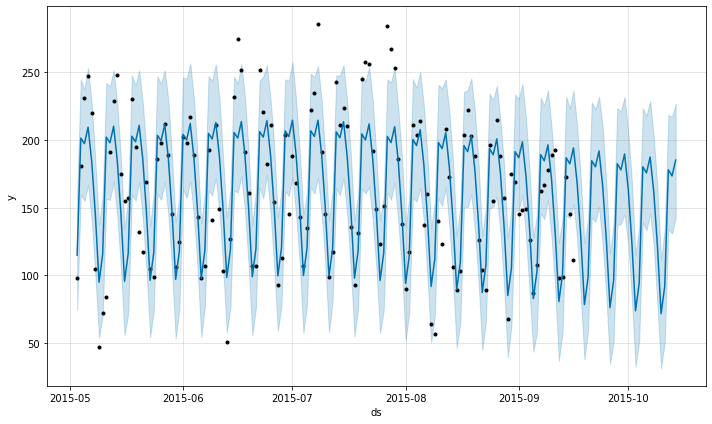

In [7]:
# plt.style.use('seaborn-white')  # didnt change prophet chart
fig1 = m.plot(dfforecast)
# fig1.savefig('../img/fb_plot_def.png')

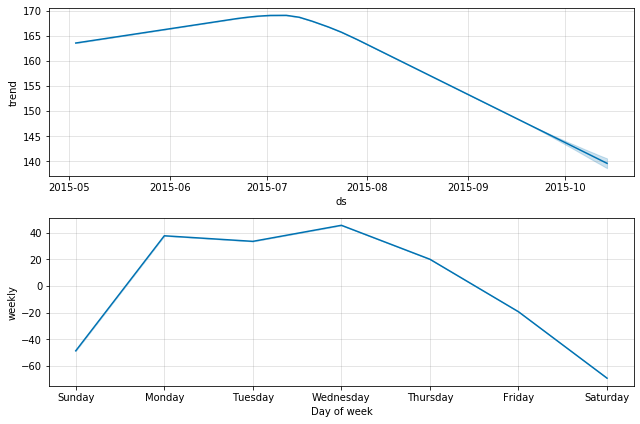

In [8]:
fig2 = m.plot_components(dfforecast)
# fig2.savefig('../img/fb_comp_def.png')

In [9]:
dfforecast['yhat'].shape # is 165 = 137 + 28
dfforecast.iloc[-28: , -1].values

array([168.33640613, 128.59568988,  78.38259278,  98.61280862,
       184.70403854, 180.19202731, 191.93694035, 166.0955564 ,
       126.35484016,  76.14174305,  96.37195889, 182.46318882,
       177.95117758, 189.69609063, 163.85470668, 124.11399043,
        73.90089333,  94.13110916, 180.22233909, 175.71032786,
       187.4552409 , 161.61385695, 121.8731407 ,  71.6600436 ,
        91.89025944, 177.98148937, 173.46947813, 185.21439117])

In [10]:
# dfday[['ds']].head()

In [11]:
help(Prophet)

Help on class Prophet in module fbprophet.forecaster:

class Prophet(builtins.object)
 |  Prophet(growth='linear', changepoints=None, n_changepoints=25, changepoint_range=0.8, yearly_seasonality='auto', weekly_seasonality='auto', daily_seasonality='auto', holidays=None, seasonality_mode='additive', seasonality_prior_scale=10.0, holidays_prior_scale=10.0, changepoint_prior_scale=0.05, mcmc_samples=0, interval_width=0.8, uncertainty_samples=1000, stan_backend=None)
 |  
 |  Prophet forecaster.
 |  
 |  Parameters
 |  ----------
 |  growth: String 'linear' or 'logistic' to specify a linear or logistic
 |      trend.
 |  changepoints: List of dates at which to include potential changepoints. If
 |      not specified, potential changepoints are selected automatically.
 |  n_changepoints: Number of potential changepoints to include. Not used
 |      if input `changepoints` is supplied. If `changepoints` is not supplied,
 |      then n_changepoints potential changepoints are selected uniforml

In [18]:
# help(add_changepoints_to_plot)
help(plot_weekly)

Help on function plot_weekly in module fbprophet.plot:

plot_weekly(m, ax=None, uncertainty=True, weekly_start=0, figsize=(10, 6), name='weekly')
    Plot the weekly component of the forecast.
    
    Parameters
    ----------
    m: Prophet model.
    ax: Optional matplotlib Axes to plot on. One will be created if this
        is not provided.
    uncertainty: Optional boolean to plot uncertainty intervals, which will
        only be done if m.uncertainty_samples > 0.
    weekly_start: Optional int specifying the start day of the weekly
        seasonality plot. 0 (default) starts the week on Sunday. 1 shifts
        by 1 day to Monday, and so on.
    figsize: Optional tuple width, height in inches.
    name: Name of seasonality component if changed from default 'weekly'.
    
    Returns
    -------
    a list of matplotlib artists

